In [1]:
## Please remember to update "COT.py" to the newest version

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from COT import COT, OVO

In [2]:
## Download GSE28490

import GEOparse

gse = GEOparse.get_GEO(geo="GSE28490", destdir="./", silent=True)

In [3]:
## Select needed cell types

cellTypes = {"Neutrophils": [], "NK": [], "CD19+ B": [], "CD8+ T": [], "CD14+ monocytes": []}

sampleType = [] # cell type labels
for cell in cellTypes:
    for gsm in gse.phenotype_data.index.values:
        if cell in gse.phenotype_data["source_name_ch1"][gsm]:
            cellTypes[cell].append(gsm)
            sampleType.append(cell)
            
samples = [] # sample ID
for cell in cellTypes:
    samples = samples + cellTypes[cell]   
    
data = gse.pivot_samples('VALUE')[samples] # selected raw data

In [4]:
## Run COT

cot = COT(df_raw=data, logarithmic_data=True)
cot.generate_subtype_means(sampleType)
cot.generate_cos_values()

COT: package initiated.
COT: subtype means generated.
COT: cos values generated.


In [5]:
## Estimate p-value

cot.estimate_p_values()

COT: estimating p-values ...
COT: iteration 1: 13.0915 seconds
COT: iteration 2: 12.9144 seconds
COT: iteration 3: 12.9713 seconds
COT: iteration 4: 12.8936 seconds
COT: iteration 5: 10.8086 seconds
COT: iteration 6: 10.5740 seconds
COT: p-values estimated.


COT: marker generated.


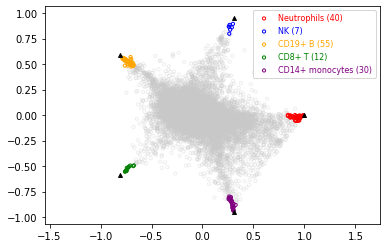

In [6]:
## Plot the markers on the simplex

cot.obtain_subtype_markers(top=144)
cot.plot_simplex()

COT: package initiated.
COT: subtype means generated.
COT: cos values generated.
COT: estimating p-values ...
COT: iteration 1: 12.9894 seconds
COT: iteration 2: 11.7898 seconds
COT: iteration 3: 13.2970 seconds
COT: iteration 4: 12.8642 seconds
COT: iteration 5: 11.8524 seconds
COT: iteration 6: 10.7495 seconds
COT: p-values estimated.
COT: marker generated.
COT: pipeline completed.


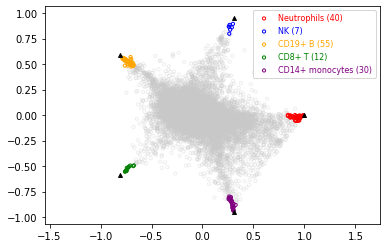

In [7]:
## or, use the COT pipeline

cot_pl = COT(df_raw=data, logarithmic_data=True)
cot_pl.cot_pipeline(subtype_label=sampleType, top=144)

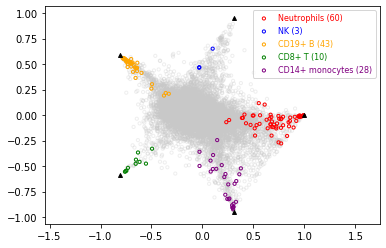

In [8]:
## OVO t-stats

ovo = OVO(df_raw=data, logarithmic_data=True, silent=True)
ovo.generate_subtype_means(sampleType)
ovo.generate_ovo_tstats()

ovo.obtain_subtype_markers(top=144)
ovo.plot_simplex()

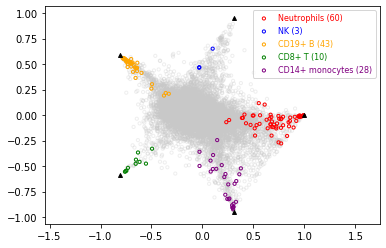

In [9]:
## or, use the OVO pipeline

ovo_pl = OVO(df_raw=data, logarithmic_data=True, silent=True)
ovo_pl.ovo_pipeline(subtype_label=sampleType, top=144)

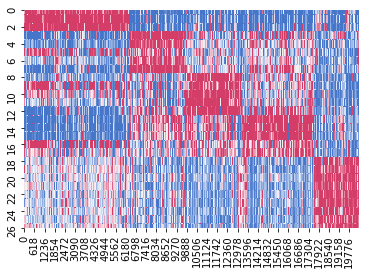

In [10]:
## plot heatmap

import seaborn as sns
from sklearn.preprocessing import StandardScaler

order = {v: i for i, v in enumerate(cot.df_mean.columns)}
index = cot.df_cos['subtype'].map(order).sort_values().index
data = StandardScaler().fit_transform(cot.df_raw.loc[index].T)

sns.heatmap(data, vmin=-1.0, vmax=+1.0, cbar=False, cmap=sns.diverging_palette(255, 0, n=100))